In [ ]:
## Word Clouds for Data Exploration

In this part, wordclouds are used to obtain an admittedly superficial overview of the data and in particular its differences across time and genre. There is, of course, considerable controversy over the utility of word clouds, because they leave behind so much information and risk the presentation of false equivalencies. For that reason we would [not expect to see wordclouds in the New York Times](http://www.niemanlab.org/2011/10/word-clouds-considered-harmful/) which argues they are actually "harmful," but others have argued that when properly used, wordclouds can offer some useful insight. In particular, Elijah Meeks of Netflix argues that wordclouds are [naturally suited to interpretation of topic modeling processes](https://dhs.stanford.edu/algorithmic-literacy/using-word-clouds-for-topic-modeling-results/). We use wordclouds to establish a heuristic baseline for inquiry into semantic content: will our more advanced analytical methods reveal more insight than just assessing which words are used most often?  First, we partition the data by decade and then by genre, displaying unadorned word clouds using the library graciously published by Andreas Mueller at https://github.com/amueller/word_cloud. Since we are only interested in exploratory use at this point, there is no need to use the visually richer d3-based visualizations based on the work of [Jason Davies](https://www.jasondavies.com/) at https://github.com/jasondavies/d3-cloud. 

After running the LDA analyses on the sample according to decade and genre, we will return to wordcloud to explore the Meeks hypothesis that wordclouds are useful for topic interpretation, comparing their value to the more straightforward ocular inspection technique. 

To begin, the standard set of modules are imported:

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import json

The wordcloud library requires that the local machine have access to the C compiler for python, as well as PIL, the pythng image library. The constant set STOPWORDS is contained in the wordcloud module. An initial run of this procedure yielded a high prevalence of the word "oh" in all subsets, and it is a word often used for a rhythmic or other non-semantic purpose, so it is added to the stopwords set.  Other words that appear prevalently in all subsets are "love," "baby," and surprisingly, "know." Because these can have semantic content, however, it was not considered appropriate to stop them. For example, there may be some insight to be gained from the prevalence of "love" in all generes except hip-hop.

In [2]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add("oh")
import json


 Load the data, which was extensively conditions elsewhere in this project at __________

In [3]:
df=pd.read_csv("../../data/conditioned/master_lyrics_with_all_years_genres.csv")

# initialize the master frequency dictionaries

decadewordfreq={}   #will be keyed by integer representing decade, 1000 for all decades

genrewordfreq = {}  # will be keyed by string representing genre, with the /wiki intact 
del df['Unnamed: 0'] # some junk that got saved in the json dump. 
df.head(2)

,song_key,lyrics,lyrics_url,lyrics_abstract,decade,artist,title,year,band_singer,ranking,song,songurl,url,born,genres,ya,/w/index.php?title=Country_Rap&action=edit&redlink=1,/wiki/2_Tone,/wiki/A_cappella,/wiki/Acid_house,/wiki/Acid_jazz,/wiki/Acid_rock,/wiki/Acoustic_music,/wiki/Acoustic_rock,/wiki/Adult_Contemporary,/wiki/Adult_Contemporary_Music,/wiki/Adult_contemporary,/wiki/Adult_contemporary_music,/wiki/Adult_contemporary_music#Soft_adult_contemporary,/wiki/Afrobeat,/wiki/Album-oriented_rock,/wiki/Alternative_R%26B,/wiki/Alternative_country,/wiki/Alternative_dance,/wiki/Alternative_dance#Indietronica,/wiki/Alternative_hip_hop,/wiki/Alternative_metal,/wiki/Alternative_pop,/wiki/Alternative_rock,/wiki/Ambient_house,/wiki/Ambient_music,/wiki/American_folk_music,/wiki/Americana_(music),/wiki/Anarcho-punk,/wiki/Anti-folk,/wiki/Arena_rock,/wiki/Art_pop,/wiki/Art_punk,/wiki/Art_rock,/wiki/Avant-garde_music,...,/wiki/Soul_music,/wiki/Southern_Rock,/wiki/Southern_gospel,/wiki/Southern_hip_hop,/wiki/Southern_rap,/wiki/Southern_rock,/wiki/Southern_soul,/wiki/Space_disco,/wiki/Space_rock,/wiki/Spoken_word,/wiki/Sunshine_pop,/wiki/Surf_music,/wiki/Surf_rock,/wiki/Swamp_pop,/wiki/Swamp_rock,/wiki/Swing_(genre),/wiki/Swing_music,/wiki/Symphonic_rock,/wiki/Synthpop,/wiki/Talking_blues,/wiki/Tech_house,/wiki/Techno,/wiki/Techno_music,/wiki/Teen_pop,/wiki/Tejano_music,/wiki/Thrash_metal,/wiki/Traditional_pop,/wiki/Traditional_pop_music,/wiki/Trance_music,/wiki/Trap_music,/wiki/Trip_hop,/wiki/UK_funky,/wiki/UK_garage,/wiki/Underground_hip_hop,/wiki/Urban_adult_contemporary,/wiki/Urban_contemporary,/wiki/Urban_contemporary_gospel,/wiki/Urban_music,/wiki/Vocal_music,/wiki/West_Coast_Rap,/wiki/West_Coast_hip_hop,/wiki/West_coast_hip_hop,/wiki/Western_music_(North_America),/wiki/Western_swing,/wiki/Witch_house,/wiki/World_music,/wiki/Worldbeat,/wiki/Worship_music,/wiki/Zydeco,NA
0,1970-1,When you're weary. Feeling small. When tears a...,http://lyrics.wikia.com/Simon_And_Garfunkel:Br...,When you're weary. Feeling small. When tears a...,1970,Simon and Garfunkel,Bridge over Troubled Water,1970,Simon & Garfunkel,1,Bridge over Troubled Water,/wiki/Bridge_over_Troubled_Water_(song),/wiki/Simon_%26_Garfunkel,False,[/wiki/Folk_rock],"1957–1970 (Reunions: 1975, 1981–83, 1990, 1993...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1970-2,Why do birds suddenly appear. Everytime you ar...,http://lyrics.wikia.com/Carpenters:%28They_Lon...,Why do birds suddenly appear. Everytime you ar...,1970,The Carpenters,(They Long to Be) Close to You,1970,The Carpenters,2,(They Long to Be) Close to You,/wiki/(They_Long_to_Be)_Close_to_You,/wiki/The_Carpenters,False,"[/wiki/Pop_music, /wiki/Soft_rock, /wiki/Adult...",1969–1983,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Thanks to Andreas Mueller's library, the function that builds the simple word cloud is uncomplicated, and the underlying word frequency data can easily be stored. This is modularized in a function that returns the list of word,frequency tuples:

In [4]:
def buildcloud(text,title,stopwords=STOPWORDS):
    wordcloud = WordCloud(stopwords=STOPWORDS, width=320, height=320)
    wordfreq = wordcloud.process_text(text)
    viz = wordcloud.generate_from_frequencies(wordfreq)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    return wordfreq

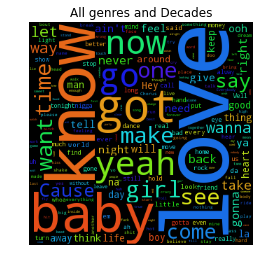

In [5]:
text=""
for r in df.iterrows():
    text = text + str(r[1][1])

genrewordfreq["All"] = buildcloud(text,"All genres and Decades")

This setup makes it quite easy to create wordclouds from the works of individual artists:

In [6]:
def artistcloud(artist):
    dfa=df[df.band_singer==artist]
    text=""
    print "Songs included:"
    for r in dfa.iterrows():
        print r[1][6]
        text = text + str(r[1][1])
    buildcloud(text,"Collected Lyrics of "+artist)
 

Songs included:
Teardrops on My Guitar
Our Song
Teardrops on My Guitar
Love Story
Love Story
You Belong with Me
White Horse
Whataya Want from Me
You Belong with Me
Two Is Better Than One
Today Was a Fairytale
Back to December
We Are Never Ever Getting Back Together
I Knew You Were Trouble
22
Highway Don't Care
Shake It Off


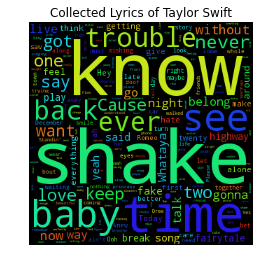

In [7]:
artistcloud("Taylor Swift" )

Songs included:
With or Without You
I Still Haven't Found What I'm Looking For
Desire
Mysterious Ways
One
Hold Me, Thrill Me, Kiss Me, Kill Me
Beautiful Day


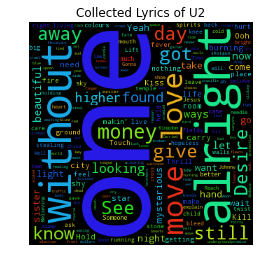

In [8]:
artistcloud("U2")

And aggregating across decades:

Decade: 1970


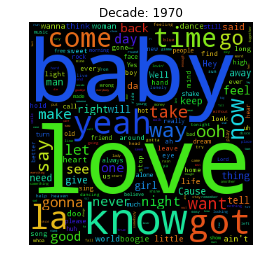

Decade: 1980


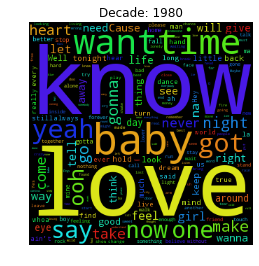

Decade: 1990


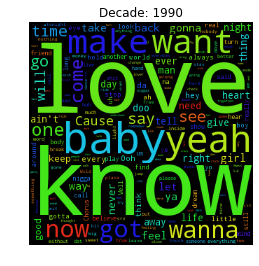

Decade: 2000


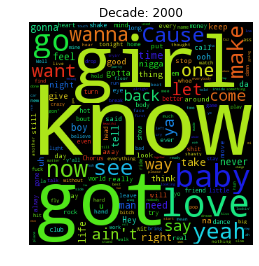

Decade: 2010


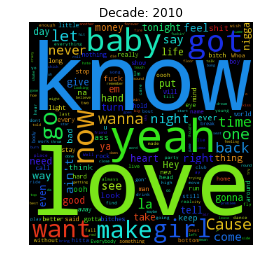

In [9]:
for decade in range(1970,2020,10):
    dfdecade = df[df.decade==decade]
    text= ""
    for r in dfdecade.iterrows():
        text = text + str(r[1][1])
    print "Decade: "+str(decade)
    decadewordfreq[int(decade)]=buildcloud(text,"Decade: "+str(decade))
    
#save the decade word frequency data
with open("decade_word_frequency.json","w") as fd:
    json.dump(decadewordfreq, fd)

### Wordclouds by Genre

This part builds wordclouds for the genres having more than a specified minimum number of members in the sample. For this display, the minimum number was 300. 


In [10]:
# get the list of genres from the stored json object
with open("songsbygenre.json") as json_file:
    genre_dict = json.load(json_file)
j=genre_dict

In [22]:
# Define the function that aggregates all the words in a genere and calls wordcloud() on the mass.
# the minlen prameter prevents small samples from being used. At 500 it returns about six clouds.
# the function also adds the word fequency list to the genre word frequency dictionary
def genrecloud(genre, minlen=500):
    songs =  j[genre]   # songs now holds a list of song_key s for the genre
    text = ''
    rejectionlist=[]

    if len(songs) < minlen:
        rejectionlist.append(genre+" Insufficient Number ("+str(len(songs))+ ")")
    else:
        # select each song, make a mini-df of one row  
        for song in songs:
            dfg=df[df.song_key == song]
            # can't get the text out cleanly except with itterrows() dont know why
            for row in dfg.iterrows():
                text = text + str(row[1][1])
        genrewordfreq[genre]=buildcloud(text,genre)
    return rejectionlist

def genrecloud2(genre, minlen=500):
    songs =  j[genre]
    text = ''
    rejectionlist=[]
    if len(songs) < minlen:
        rejectionlist.append(genre+"  ("+str(len(songs))+ ")")
    else:

        dfh=df[df[genre]==True]
        for row in dfh.iterrows():
            text = text + str(row[1][1])
    genrewordfreq[genre]=buildcloud(text,genre)


Limited to Genres containing at least  300  songs


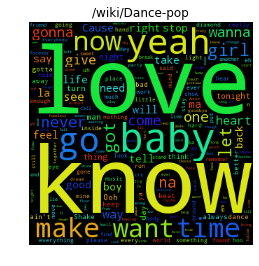

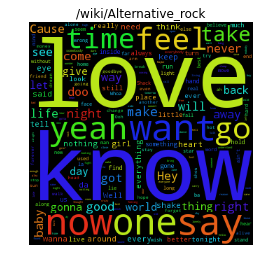

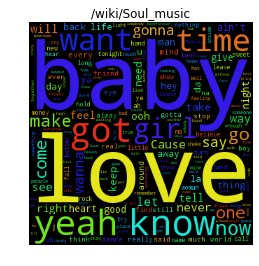

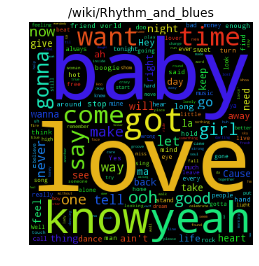

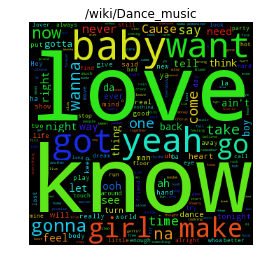

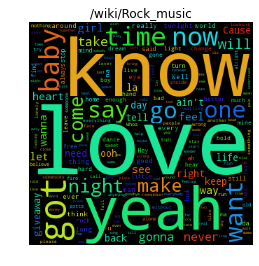

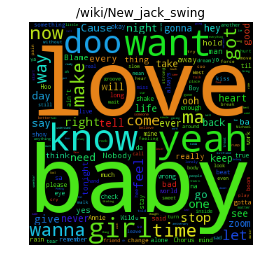

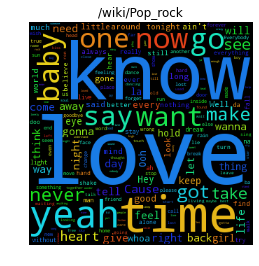

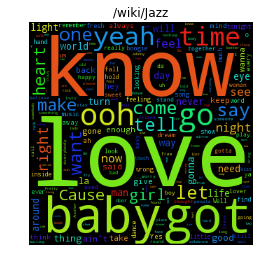

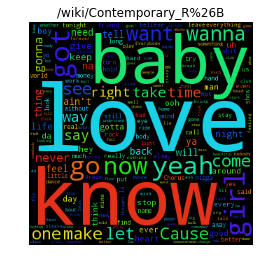

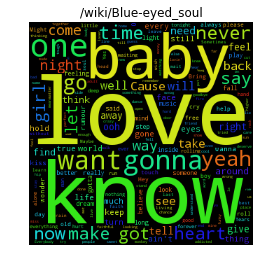

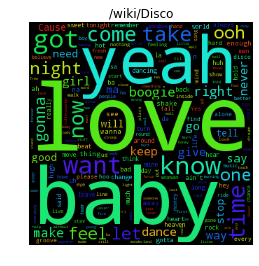

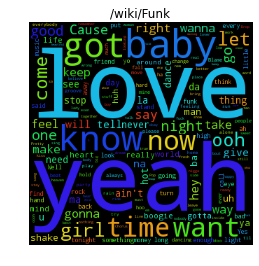

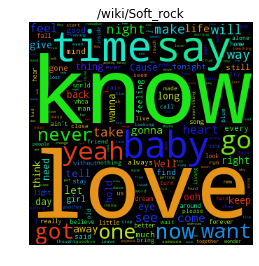

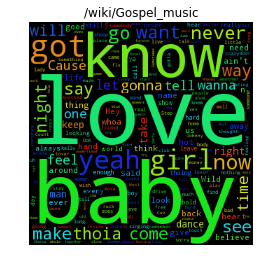

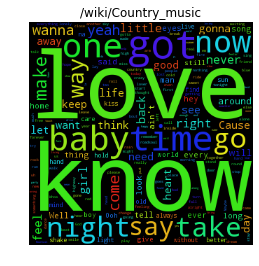

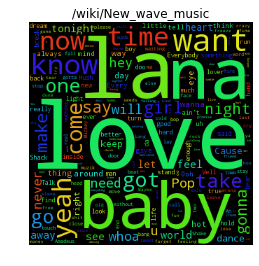

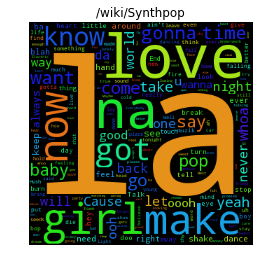

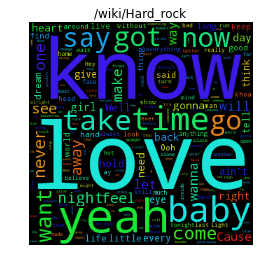

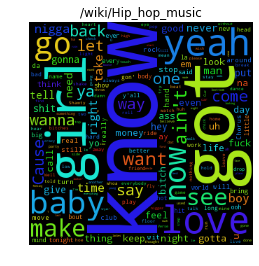

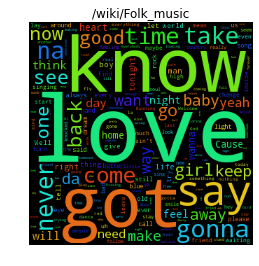

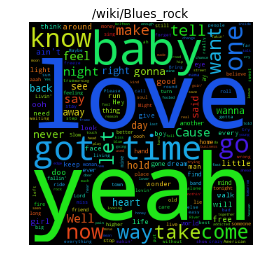

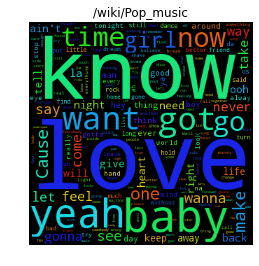

Complete.  23  Genres Pictured


In [23]:

# call the genrecloud() against each of the genres in songsbygenre.json
# a dictionary keyed by genre URL to a list consisting of the the song_key of each member
minlen=300
print "Limited to Genres containing at least ",minlen," songs"
counter=0
for genre in j.keys():
    #genrecloud(genre, minlen)
    if len(j[genre]) >= minlen:
        genrecloud2(genre, minlen)
        counter += 1
print "Complete. ",str(counter)," Genres Pictured"

In [24]:
#save the genre word frequency data
with open("genre_word_frequency.json","w") as fd:
    json.dump(genrewordfreq, fd)